In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [174]:
#behav = pd.read_csv('C:/Users/wonnp/Documents/GitHub/ML-For-Beginners/Photometry/data/100to300behavior.csv')
behav = pd.read_csv('C:/Users/Wonn/Documents/GitHub/ML-For-Beginners/Photometry/data/300behavior.csv')

# Assuming behav is your DataFrame and it's already imported
# Replace all occurrences of 3 with 2 in the 'NextLever' column
removeOmits = behav[behav['NextLever'] != 0]


In [175]:
removeOmits['NextLever'] = removeOmits['NextLever'].replace(1, 0)
removeOmits['NextLever'] = removeOmits['NextLever'].replace(3, 1)
removeOmits['NextLever'] = removeOmits['NextLever'].replace(2, 1)

ex29 = removeOmits[removeOmits['ID'] != 29]

df = ex29[(ex29['Trial#'] > 20) & ~(ex29['Trial#'].isin([40, 60]))]

df.head


C:\Users\Wonn\AppData\Local\Temp\ipykernel_23328\949757128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removeOmits['NextLever'] = removeOmits['NextLever'].replace(1, 0)
C:\Users\Wonn\AppData\Local\Temp\ipykernel_23328\949757128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removeOmits['NextLever'] = removeOmits['NextLever'].replace(3, 1)
C:\Users\Wonn\AppData\Local\Temp\ipykernel_23328\949757128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

<bound method NDFrame.head of       ID    Date  Trial#  Lever  NextLever  WSLS  LeverZmax  LeverZmin  \
20    16  230123      21      3          1     1   2.401602  -1.003824   
21    16  230123      22      3          1     1   2.926855  -1.217437   
22    16  230123      23      3          1     1   1.696856  -1.406294   
23    16  230123      24      3          1     1   1.724995  -1.203465   
24    16  230123      25      3          1     1   0.747431  -1.450247   
...   ..     ...     ...    ...        ...   ...        ...        ...   
1668  32  230407      46      2          1     4   2.178934  -2.011815   
1669  32  230407      47      2          0     2   1.441027  -1.541796   
1671  32  230407      50      1          1     0   0.368848  -0.990443   
1672  32  230407      51      3          0     3   3.332265  -1.602789   
1674  32  230407      55      1          1     0   0.637471  -3.201188   

        LeverAUC    HLZmax    HLZmin       HLAUC  
20     80.581480  2.714354 -3.

In [176]:
from sklearn.utils import resample

# Assuming 'df' is your DataFrame and 'NextLever' is the target column
# First, split the data into two separate DataFrames based on the class
df_class_0 = df[df['NextLever'] == 0]
df_class_1 = df[df['NextLever'] == 1]

# Find the number of samples in the smaller class
n_samples = min(len(df_class_0), len(df_class_1))

# Downsample the larger class to the size of the smaller class
df_class_0_downsampled = resample(df_class_0, replace=False, n_samples=n_samples, random_state=42)
df_class_1_downsampled = resample(df_class_1, replace=False, n_samples=n_samples, random_state=42)

# Combine the downsampled classes back into a single DataFrame
df_balanced = pd.concat([df_class_0_downsampled, df_class_1_downsampled])

# Now df_balanced has an equal number of samples from both classes
print(df_balanced['NextLever'].value_counts())  # Should print the same number for both classes


NextLever
0    109
1    109
Name: count, dtype: int64


In [179]:
df_balanced[df_balanced['Lever'] == 1].mean()

ID               17.066667
Date         230143.960000
Trial#           45.093333
Lever             1.000000
NextLever         0.093333
WSLS              0.000000
LeverZmax         1.190496
LeverZmin        -1.898303
LeverAUC        -37.893952
HLZmax            1.975024
HLZmin           -1.326797
HLAUC            33.398844
dtype: float64

In [226]:
feature_names = ['Trial#','Lever','LeverZmax','LeverZmin','LeverAUC','HLZmax','HLZmin','HLAUC','NextLever'] 
df_filtered = df_balanced[feature_names]

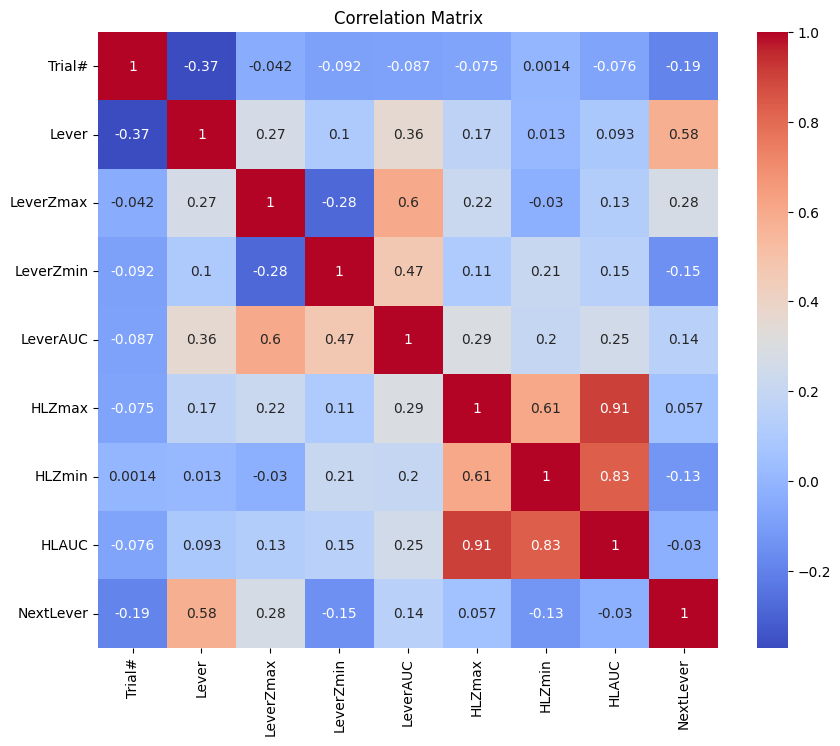

In [227]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
corr_matrix = df_filtered.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [228]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' and a target variable 'target'

# Splitting data into features and target
X = df_filtered.drop('NextLever', axis=1)  # Replace 'target' with your target column name
y = df_filtered['NextLever']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features (important for logistic regression models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Creating the SVM model
# 'class_weight='balanced'' will automatically adjust weights inversely proportional to class frequencies
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True)

# Fitting the model to the training data
svm_model.fit(X_train_scaled, y_train)

# Making predictions on the test data
y_pred = svm_model.predict(X_test_scaled)
probabilities = svm_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities of the positive class

# Evaluating the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        32
           1       0.74      0.76      0.75        34

    accuracy                           0.74        66
   macro avg       0.74      0.74      0.74        66
weighted avg       0.74      0.74      0.74        66

Confusion Matrix:
[[23  9]
 [ 8 26]]


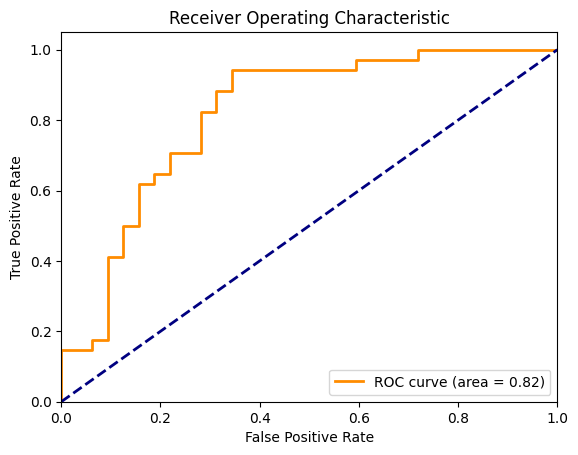

In [229]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming rf_model is your trained classifier
# and X_test, y_test are your test dataset and labels

# Get predicted probabilities for the positive class
y_score = svm_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)  # Adjust pos_label if necessary
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

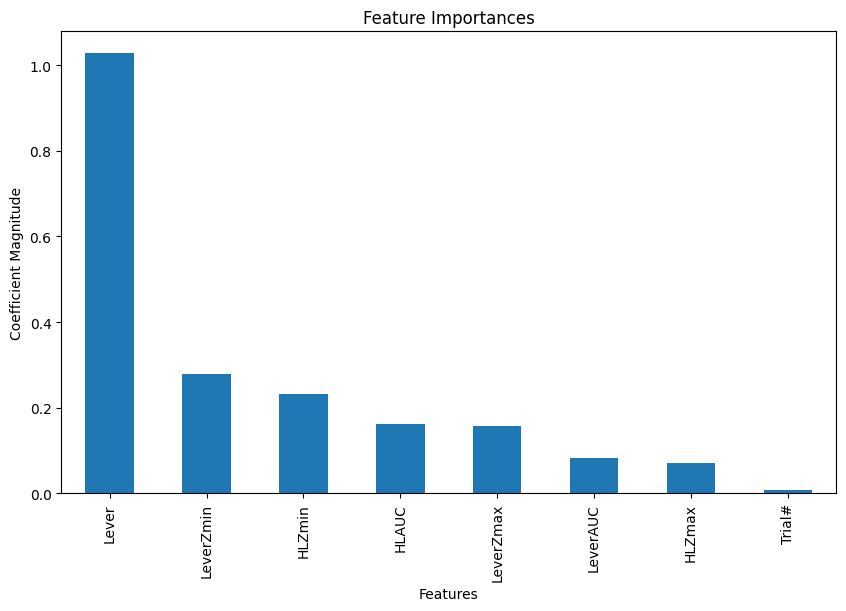

In [230]:
# Assuming 'svm_model' is your trained linear SVM model
coefficients = svm_model.coef_[0]  # For binary classification
import pandas as pd

# Assuming 'feature_names' is a list of your feature names
features = ['Trial#','Lever','LeverZmax','LeverZmin','LeverAUC','HLZmax','HLZmin','HLAUC']
feature_importance = pd.DataFrame(coefficients, index=features, columns=['Coefficient'])

import matplotlib.pyplot as plt

# Sorting the features by the magnitude of their coefficients
sorted_features = feature_importance.abs().sort_values(by='Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sorted_features['Coefficient'].plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.show()


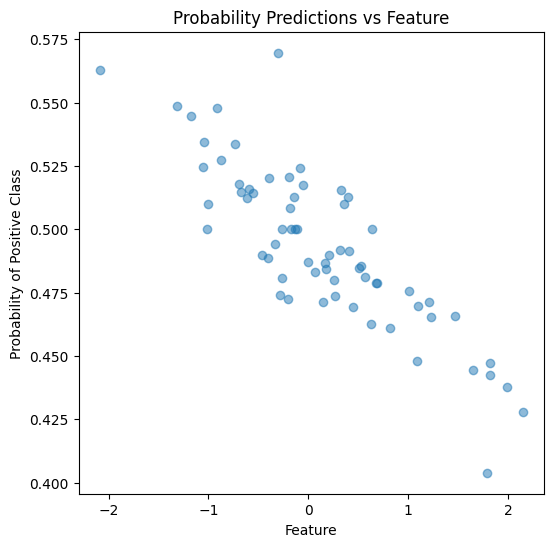

In [224]:
import matplotlib.pyplot as plt
import numpy as np

# Choose a feature for the x-axis
feature_for_x_axis = X_test_scaled[:,0]  # Replace 'feature_name' with your chosen feature

# Sorting the values for better visualization
sorted_indices = np.argsort(feature_for_x_axis)
sorted_feature = feature_for_x_axis[sorted_indices]
sorted_probabilities = probabilities[sorted_indices]

# Plotting
plt.figure(figsize=(6,6))
plt.scatter(sorted_feature, sorted_probabilities, alpha=0.5)
plt.xlabel('Feature')
plt.ylabel('Probability of Positive Class')
plt.title('Probability Predictions vs Feature')
#plt.xlim(-3, 6)
#plt.ylim(0.7, 1.05)

plt.show()



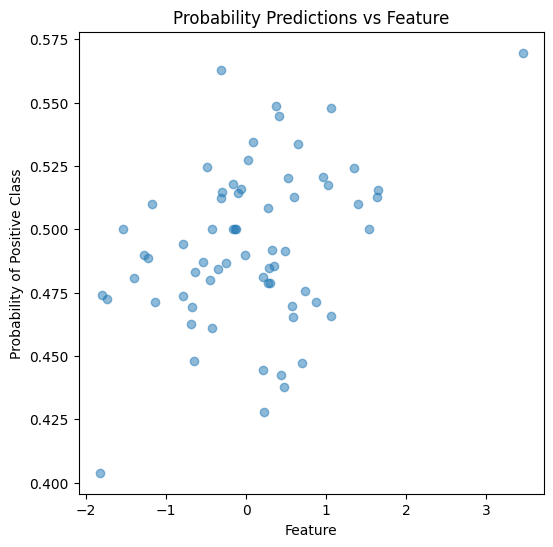

In [225]:
import matplotlib.pyplot as plt
import numpy as np

# Choose a feature for the x-axis
feature_for_x_axis = X_test_scaled[:,1]  # Replace 'feature_name' with your chosen feature

# Sorting the values for better visualization
sorted_indices = np.argsort(feature_for_x_axis)
sorted_feature = feature_for_x_axis[sorted_indices]
sorted_probabilities = probabilities[sorted_indices]

# Plotting
plt.figure(figsize=(6,6))
plt.scatter(sorted_feature, sorted_probabilities, alpha=0.5)
plt.xlabel('Feature')
plt.ylabel('Probability of Positive Class')
plt.title('Probability Predictions vs Feature')
plt.show()